# Vector Calculus

Classical electrodynamics describes electromagnetic fields that vary in time and space.  To describe these variations, we use the mathematical framework of ***vector calculus***.  This means that we take derivatives and integrals of scalar and vector fields in three dimensions.  This notebook will introduce you to the most important operations of vector calculus in electrodynamics and give you some tools for visualizing the effect of these operations.

## Modules

A **module** is a collection of Python functions defined in a separate file.  This notebook uses a couple of custom modules: `Electrodynamics.py` and `VectorCalculus.py`.

Before we import them, find these files in your directory, open them, and inspect their contents.

- What are some of the functions defined in these modules?  What do they do?

VectorCalculus.py Contains multiple functions related to vector calculus, these include functions that take the gradient and divergence, as well as curl and several others. these functions for the basis for performing vector calculus in python. 

Electrodynamics.py Contains functions that compute the field or potential of a point charge and then draw the vector or scalar field. These help with visualization. 

In [1]:
# Get access to useful functions.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Get access to custom functions.
import VectorCalculus as vc
import Electrodynamics as ed


from importlib import reload
reload(vc)
reload(ed)

<module 'Electrodynamics' from 'C:\\Users\\jfhdj\\Documents\\School\\Physics\\electrodynamics\\week-02\\Electrodynamics.py'>

In [2]:
## Use this command to turn ON interactive plots:
# %matplotlib notebook

## Use this command to turn OFF interactive plots.
# %matplotlib inline

Now that we have access to the functions, let's create an electric field, an electrostatic potential, and start exploring.

In [3]:
# Define coordinate grid.
num_points = 257
box_size = 5

# Store coordinate arrays.
X,Y,Z = ed.coordinates(L=box_size, N=num_points)

# Compute grid spacing.
ds = X[1,0,0] - X[0,0,0]

# Store grid and spacing in a single object for repeated use later.
grid = (X,Y,Z,ds)

# Define charge and location of two point charges.
Q1 = +1
x1 = -1
y1 = 0
z1 = 0
R1 = np.array([x1,y1,z1])

Q2 = +1
x2 = +1
y2 = 1
z2 = 0
R2 = np.array([x2,y2,z2])

# Compute the potential.
V  = ed.point_charge_potential(Q1, R1, X, Y, Z)
V += ed.point_charge_potential(Q2, R2, X, Y, Z)

# Compute the electric field.
E  = ed.point_charge_field(Q1, R1, X, Y, Z)
E += ed.point_charge_field(Q2, R2, X, Y, Z)

<Axes3DSubplot:>

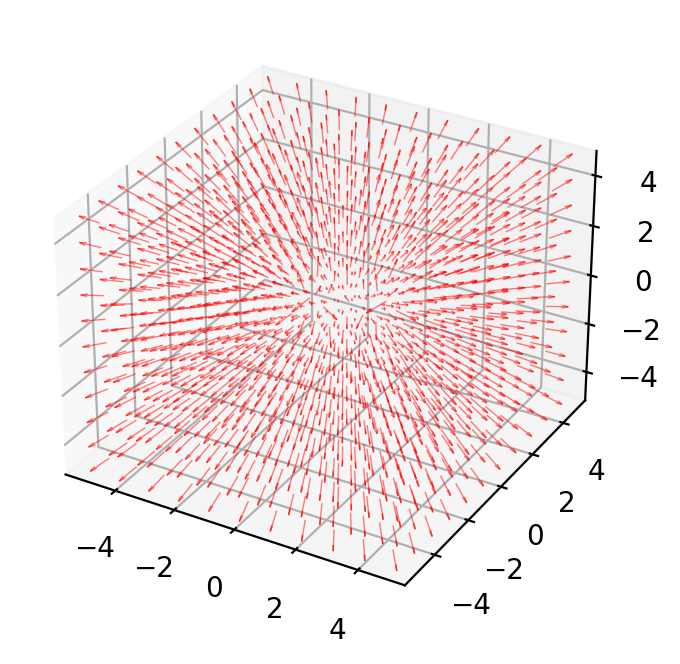

In [4]:
# Draw the electric field.
ed.draw_vector_field(X,Y,Z,*E)

<AxesSubplot:>

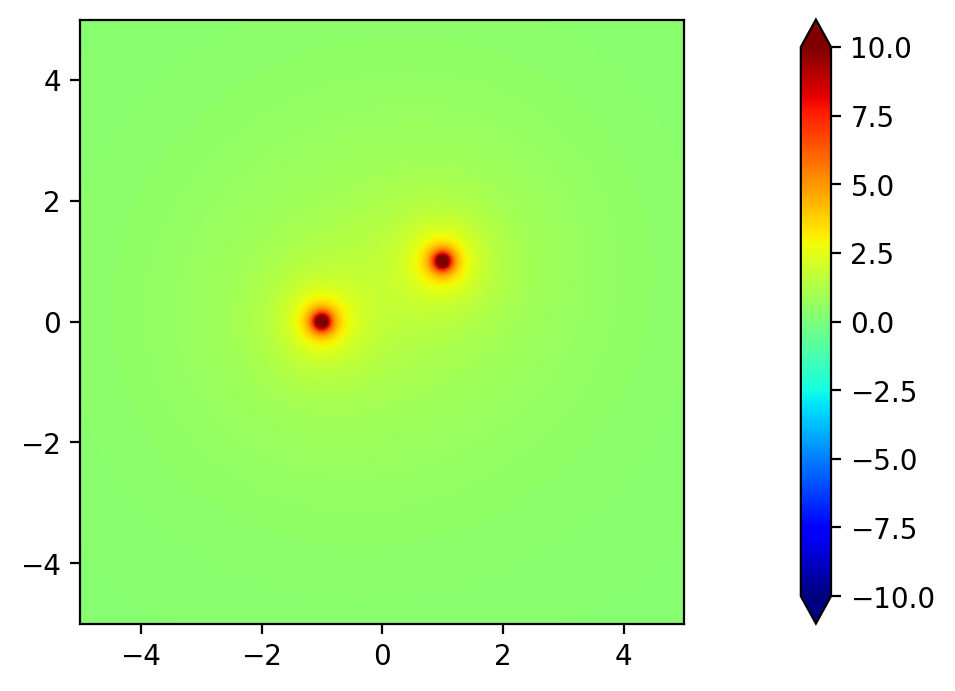

In [5]:
# Draw a slice through the potential.
z0 = 0.0
ed.draw_scalar_field(X,Y,Z,V,z0, cutoff=10)

## Integrals

When you first learned what an integral was, you probably learned about a one dimensional integral of a function of just one variable: $\int dx \, f(x)$.  In electrodynamics, we have three dimensions, so all of our functions have three variables: $V(x,y,z)$, $\vec{E}(x,y,z)$.  What's more, some of the fields we work with are vector fields, so they have three components.  We can integrate these fields over lines, surfaces, or volumes.

Let's look at some of the useful integrals we can create.

## Line Integral

A familiar operation from vector calculus is the line integral.  We use it in classical mechanics to calculate the work required to move a system from point A to point B:

$$W = \int_{A}^{B} d\vec{s} \cdot \vec{F}$$

We can generalize the idea of the line integral to any vector field.  Let's explore this concept for the electric field of two charges.

The contour integral is 0.8884738825658773


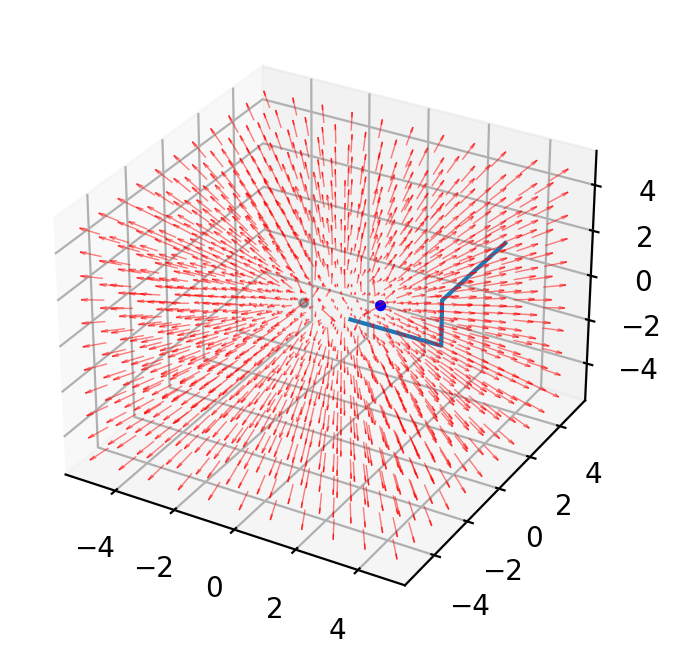

In [10]:
# Define a path.
x0 = 0
y0 = 1
z0 = -1

# Initial position.
P0 = np.array([x0,y0,z0])

# Use unit vectors to define the displacement.
dx = 3 * vc.eX
dy = 4 * vc.eY
dz = 2 * vc.eZ

# Move to endpoint in steps along a single axis.
P1 = P0 + dx
P2 = P1 + dz
P3 = P2 + dy

# Assemble the points into a list.
points = [P0, P1, P2, P3]

# Compute the contour integral.
W = vc.path_integral(E, points, *grid)

# Draw the electric field and the path.
ax = vc.draw_path(E, points, *grid)

# Indicate location of charges in plot.
ax.scatter3D(*list(zip(R1,R2)),c=['k','b'], s=9)

# Display the result.
print("The contour integral is", W)


By changing the order of the steps (dx, dy, dz) you can generate six different paths between the starting and ending point.  Do this.  What range of values do you observe for the different paths?

X,Y,Z: 0.036
X,Z,Y: 0.038
Y,X,Z: 0.028
Y,Z,X: 0.028
Z,Y,X: 0.028
Z,X,Y: 0.036

The rang of value for the contour integral goes between 0.028 and 0.038

Create a path with at least 6 points.  Plot it here.

The contour integral is 0.9675357924075363


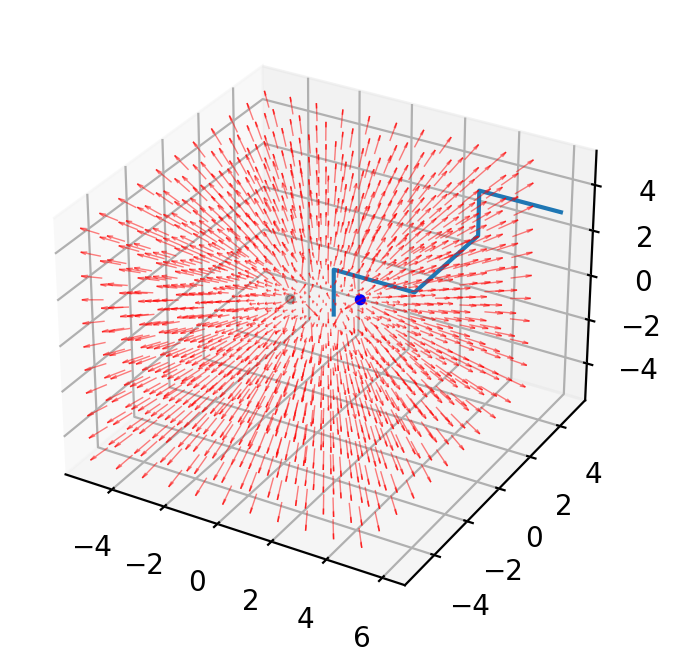

In [7]:
# Define a path.
x0 = 0
y0 = 1
z0 = -1


# Initial position.
P0 = np.array([x0,y0,z0])

# Use unit vectors to define the displacement.
dx = 3 * vc.eX
dy = 4 * vc.eY
dz = 2 * vc.eZ

# Move to endpoint in steps along a single axis.
P1 = P0 + dz
P2 = P1 + dx
P3 = P2 + dy
P4 = P3 + dz
P5 = P4 + dx

# Assemble the points into a list.
points = [P0, P1, P2, P3, P4, P5]

# Compute the contour integral.
W = vc.path_integral(E, points, *grid)

# Draw the electric field and the path.
ax = vc.draw_path(E, points, *grid)

# Indicate location of charges in plot.
ax.scatter3D(*list(zip(R1,R2)),c=['k','b'], s=9)

# Display the result.
print("The contour integral is", W)

## Circulation

If the contour for a line integral starts and ends on the same point, its value is called the **circulation** of the vector field, sometimes given the symbol $\Gamma$:

$$\Gamma = \oint d\vec{s} \cdot \vec{E}$$

The "O" on the integral sign is to indicate that the path is actually a closed loop.

The circulation integral is -0.0068668094615095265


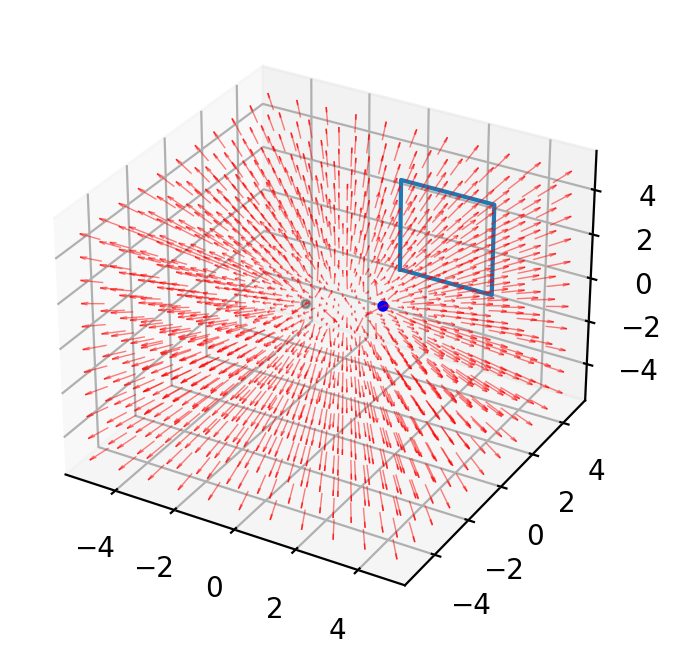

In [8]:
# Define a path.
x0 = 1
y0 = 2
z0 = 1

# Initial position.
P0 = np.array([x0,y0,z0])

# Use unit vectors to define the displacement.
dx = 3 * vc.eX
dy = 3 * vc.eY
dz = 4 * vc.eZ

# Move to endpoint in steps along a single axis.
P1 = P0 + dx
P2 = P1 + dz
P3 = P2 - dx
P4 = P3 - dz

# Assemble the points into a list.
points = [P0, P1, P2, P3, P4]

# Compute the circulation.
Gamma = vc.path_integral(E, points, *grid)

# Draw the electric field and the path.
ax = vc.draw_path(E, points, *grid)

# Indicate location of charges in plot.
ax.scatter3D(*list(zip(R1,R2)),c=['k','b'], s=9)

# Display the result.
print("The circulation integral is", Gamma)

Move the loop around and change its size and orientation by modifying the code above.  You can try adding more points if you would like.

Compute the circulation for at least 6 different contours.  What range of values do you observe?

dx,dy,dz = (3,1,1) = 0.001
dx,dy,dz = (1,3,1) = 0.0009
dx,dy,dz = (1,1,3) = 0.001
dx,dy,dz = (4,3,3) = 0.002
dx,dy,dz = (3,4,3) = 0.002
dx,dy,dz = (3,3,4) = 0.002

If i am doping this correctly, i am changing the dx,dy,dz values and the results show the range goes from 0.0009 to 0.002.

## Flux

A **flux** is often defined as an amount of *something* passing through a surface per unit time: energy, charge, mass, volume of fluid, etc.  However, the mathematical concept is more general.  We can compute the flux of *any* vector field through *any* surface.  The resulting quantity is often given the symbol $\Phi$.

$$\Phi = \int d\vec{A} \cdot \vec{E}$$

$d\vec{A}$ is an **area element** whose direction is perpendicular to the surface.  When the surface is closed, we indicate this with a modified integral sign.

$$\Phi = \oint d\vec{A} \cdot \vec{E}$$

Gauss' law is an example of flux through a closed surface.

The flux through the box is 12.725371329063599


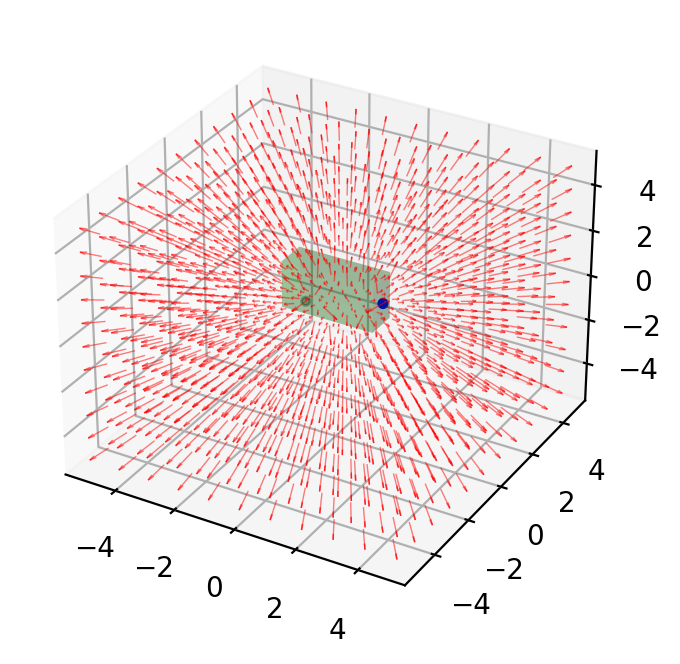

In [9]:
# Define rectangular box for computing flux.
# Coordinates of center.
xC = 0
yC = 0
zC = 0.9

# Lenth of sides.
dX = 3
dY = 1
dZ = 2

# Bottom, front, left corner, required by flux and plotting functions.
P0 = np.array([xC, yC, zC]) - np.array([dX,dY,dZ]) / 2

# Compute the flux.
Phi = vc.flux(E, P0, dX, dY, dZ, *grid)

# Draw the box and the field.
ax = vc.draw_box(E, P0, dX, dY, dZ, *grid)

# Indicate location of charges in plot.
ax.scatter3D(*list(zip(R1,R2)),c=['k','b'], s=9)

# Display the result.
print("The flux through the box is", Phi)

###### Explore the flux of this electric field.  Move the box around and change its shape by modifying the code above.

What range of values do you observe when ***no charges are in the box***?

when the box is at -4,-4,-4 the flux is 0.000155. Without moving outoside of the 4X4X4 grid space, or rotating the box to face a smaller side towards the box, this is as small as i can make it.

at (0,1,0) the flux is 0.021. This is very close to the charges but not encompassing them. This appears to be the most possible without placing the box on the charges. 

What range of values do you observe when ***only one charge is in the box***?

With one charge, the flux is +-13.48. This required the box to be placed incredible close to one charge and encompassing the other. 
The smallest value required the one charge barely be placed in the box and gave a value of +-3.32.


What range of values do you observe when ***both charges are in the box***?

The range goes between 0.12 and 0.175

## Derivatives

When you first learned about derivatives, as with integrals, you probably learned about the rate of change of a scalar function of a single variable: $\dfrac{df}{dx}$.

In mechanics, we also use derivatives of vector funcations: $\vec{v}(t) = \dfrac{d\vec{r}}{dt}$.

There are more possibilities for derivatives in three dimensions, especially when working with vector fields.  We will see three kinds of derivatives quite often in this course.

## Gradient

You may already be familiar with the gradient from an earlier physics course.  We can't simply "take the deriviative of a function" in three dimensions.  We need to specify a direction first.  The gradient is special, because it gives the direction of **steepest ascent** — the direction in which a function changes most rapidly at a particular point in space.  (If the function happens to give the height as a function of position, then the gradient points directly uphill.)

The gradient of a scalar function is defined as a collection of derivatives:
$$
\mathbf{grad}(f) = \nabla f = \dfrac{\partial f}{\partial x} \, \mathbf{e}_x
        + \dfrac{\partial f}{\partial y} \, \mathbf{e}_y
        + \dfrac{\partial f}{\partial z} \, \mathbf{e}_z
$$

In [10]:
# Define a function in 3D.
f = np.sin(X) + np.sin(Y)

# Compute its gradient.
df = vc.grad(f,ds)

<Axes3DSubplot:>

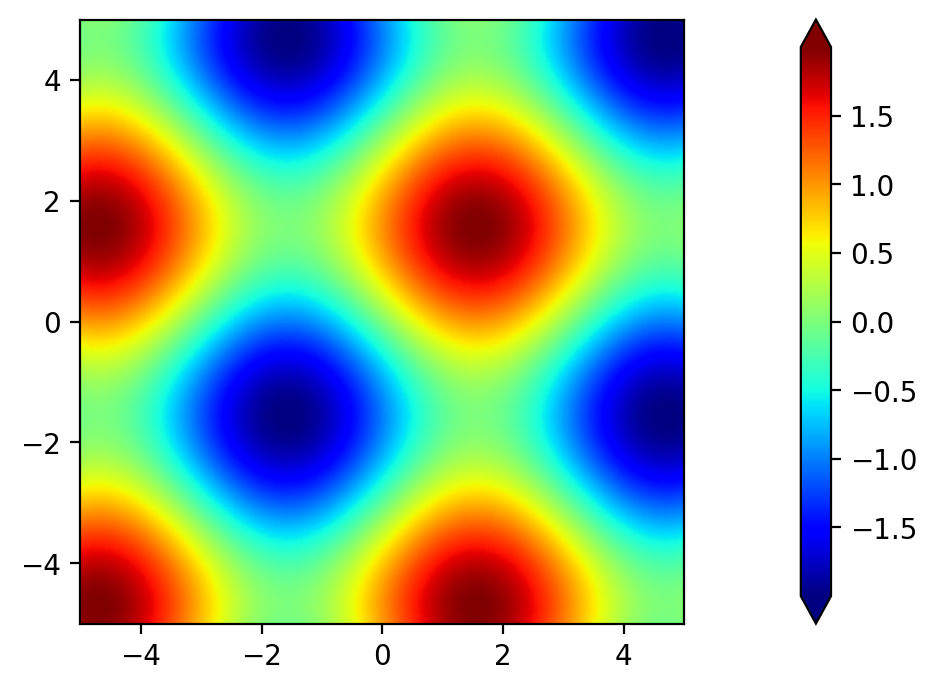

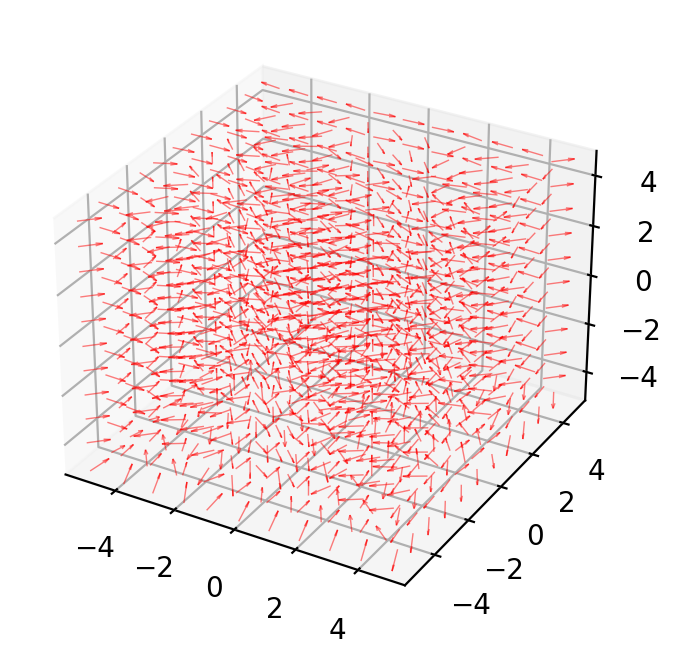

In [11]:
# Draw a slice of the function.
ed.draw_scalar_field(X,Y,Z,f, cutoff=f.max())

# Draw the resulting vector field.
ed.draw_vector_field(X,Y,Z,*df)

Compare the vector field to the scalar field.  Do the arrows make sense as a direction of steepest ascent?  Explain why or why not.

If i am interpreting this correctly, the arrows point in the dircetion of the highest value. So in this case, it makes sense as the arrows all point towards the central point, which is the highest value. 

Change the definition of $f(x,y,z)$ to plot some other functions of your choosing.  Maybe try for something with ripples ...

What are your observations about the relation of the gradient to the starting function?

The gradient follows the path of highest iuncreasing value. A fuinction with ripples dxemsonstarted this vabry well, as its not just a constant increasing field. 

**Note:** Notice that the gradient maps a scalar field to a vector field.  It is possible to take the gradient of a vector field, but the resulting object is called a ***tensor***.  In three dimensions, it has 9 components and can be interpreted as a kind of ***matrix-valued function*** at every point in space.  These are difficult to plot!

When we take the derivative of a vector field $\vec{F}(x,y,z)$, there are 9 possible derivatives:
$$
\dfrac{\partial F_x}{\partial x},
\dfrac{\partial F_x}{\partial y},
\dfrac{\partial F_x}{\partial z},
\dfrac{\partial F_y}{\partial x},
\dfrac{\partial F_y}{\partial y},
\dfrac{\partial F_y}{\partial z},
\dfrac{\partial F_z}{\partial x},
\dfrac{\partial F_z}{\partial y},
\dfrac{\partial F_z}{\partial z},
$$

It turns out that two combinations of these derivatives are all that is required for electrodynamics!  One combination, called the **divergence** produces a scalar field.  The other, called the **curl** produces another vector field.

## Divergence

The divergence of a vector field $\vec{F}(x,y,z)$ is defined as
$$\mathbf{div}(\vec{F}) = \nabla \cdot \vec{F} = 
\dfrac{\partial F_x}{\partial x} + 
\dfrac{\partial F_y}{\partial y} +
\dfrac{\partial F_z}{\partial z}
$$

In [12]:
# Define a vector field.
Fx = X
Fy = Y
Fz = Z
F = np.stack([Fx, Fy, Fz])

# Compute the divergence.
dF = vc.div(F,ds)

<AxesSubplot:>

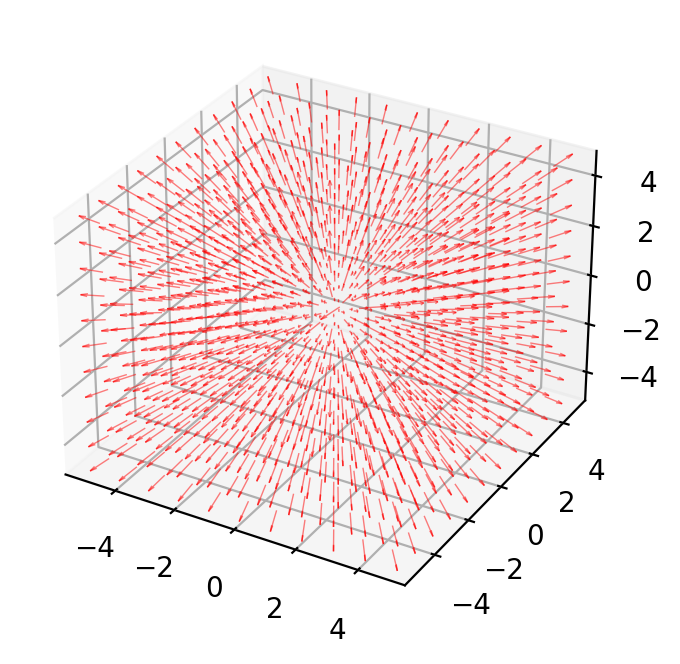

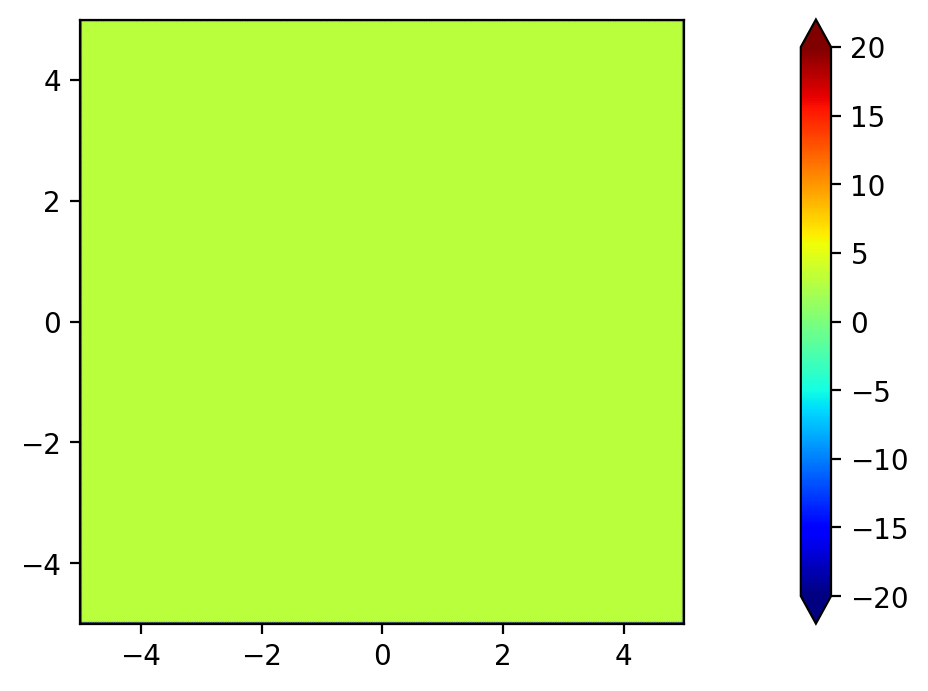

In [13]:
# Plot the vector field.
ed.draw_vector_field(X,Y,Z,*F)

# Plot the divergence.
z0 = 0.0
ed.draw_scalar_field(X,Y,Z,dF,z0)

Compare the vector field to the scalar field.  Can you identify any correlations between the scalar field and the vector field?

The basic shapem of the divergence heat map looks a lot like the shape of the vector field. In this case, the outer corners where the divergence is greatest, has the scalar field most spread out. It is difficult to determine what is happening in the center of thew vector field, but the divergende appears very small, and the arrows point in multiple directions in a single area.

Try looking at different slices of the divergence.  Try changing the definition of the vector field.  Describe your efforts and observations.

As the graph becomes less complex, and the vector field simplified, the divergence becomes more even. It does not go to zero in these cases, but it does become equal all over the graph. 

According to Maxwell's equations, the divergence of the electric field is related to the charge density ...

In [34]:
# Compute the divergence of the electric field.
dE = vc.div(E,ds)

<AxesSubplot:>

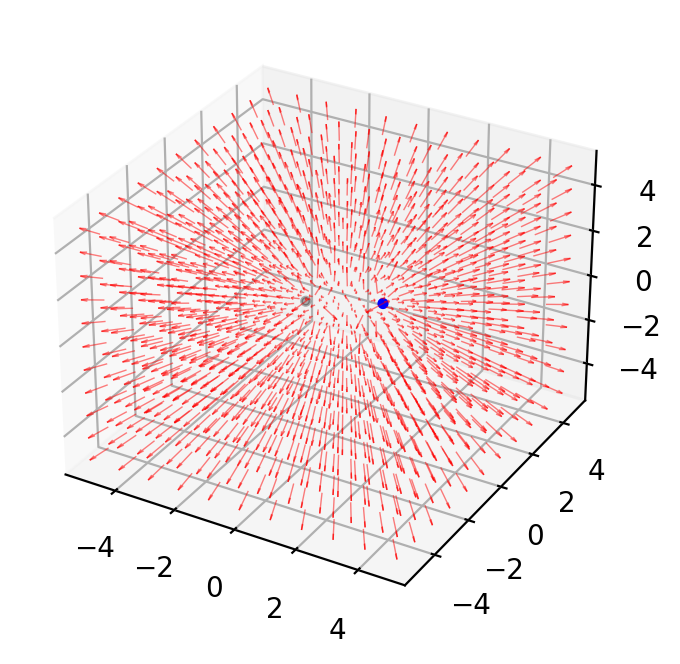

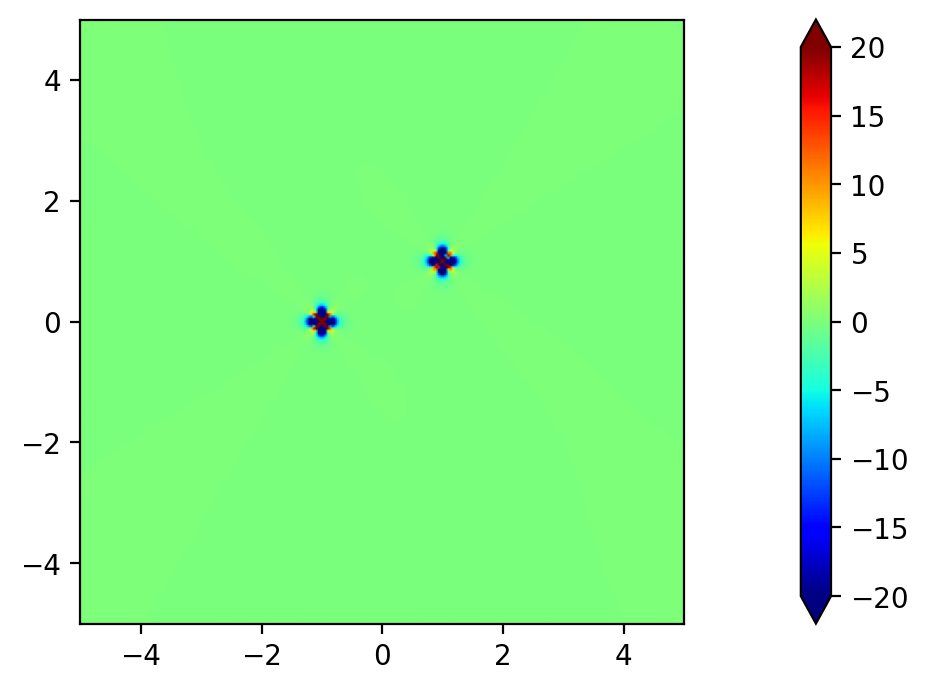

In [35]:
# Plot the vector field ...
ax = ed.draw_vector_field(X,Y,Z,*E)

# ... with charges.
ax.scatter3D(*list(zip(R1,R2)),c=['k','b'], s=9)

# Plot the divergence.
ed.draw_scalar_field(X,Y,Z,dE)

What kind of correlation do you see between the electric field and its divergence?

The stronger the field the greater the divergencer appears to be. 

Change the charges and their locations, and then recompute the field and its divergence.  Describe your efforts and the results.

When the charges are both positive the divergence is negative, and the opposite is true for the negative charges. The location did not appear to change the ovgerall divergence. 

## Curl

The other combination of derivatives that shows up frequently in physics is called the **curl** of a vector field.  It is another vector field, whose components are particular combinations of derivatives.

$$
\mathbf{curl}(\vec{F}) = \nabla \times \vec{F} =
\left(\dfrac{\partial F_z}{\partial y} - \dfrac{\partial F_y}{\partial z}\right) \, \mathbf{e}_x +
\left(\dfrac{\partial F_x}{\partial z} - \dfrac{\partial F_z}{\partial x}\right) \, \mathbf{e}_y +
\left(\dfrac{\partial F_y}{\partial x} - \dfrac{\partial F_x}{\partial y}\right) \, \mathbf{e}_z
$$

In [42]:
# Define a vector field.
Fx = Y
Fy = X-3
Fz = Z
F = np.stack([Fx, Fy, Fz])

# Compute the curl.
dF = vc.curl(F,ds)

<Axes3DSubplot:>

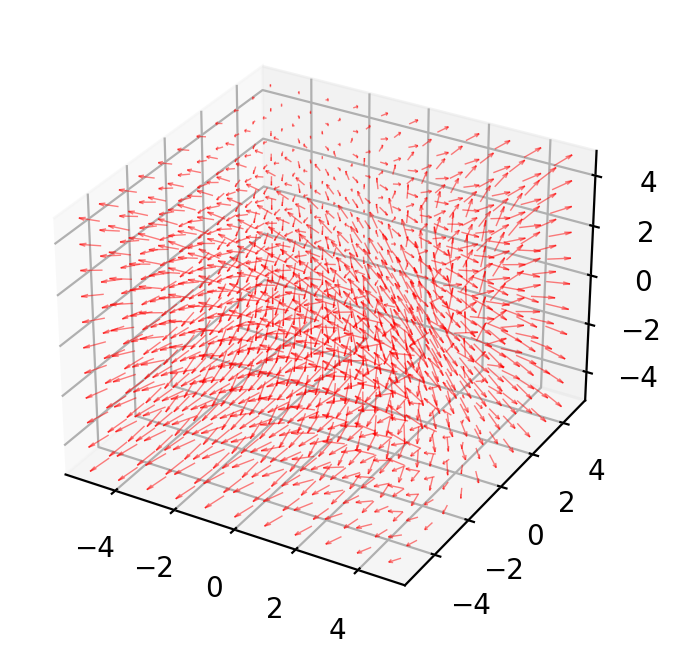

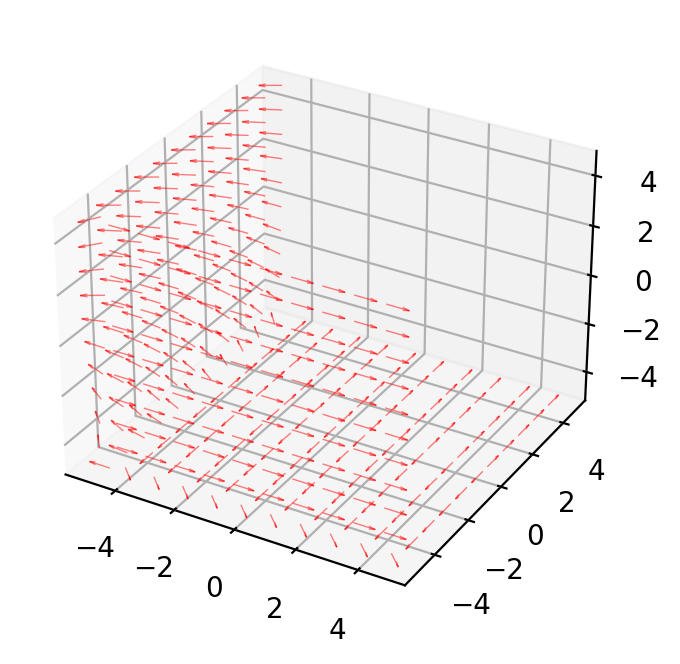

In [43]:
# Plot the vector field.
ed.draw_vector_field(X,Y,Z,*F)

# Plot the curl.
ed.draw_vector_field(X,Y,Z,*dF)

It can be hard to make sense of the mass of arrows, but give it a try.  (You can reduce the number of arrows in a plot using the `stride` keyword ...)

What patterns or correlations do you notice between the arrows in the original vector field and those in its curl?

The curl appears most uniform where the vector field is the biggest jumble of arrows. 
There does appear to be some small correlation between the vector direction adnt eh direction of the curl in some locations. 

Try changing the definition of the vector field.  Describe your efforts and observations with other functions.  What was special about the original function?

When i change the values to just X, Y, and Z, the vector field is a lot easier to understand, but the curl does now. it still shows there is some amount of curl taking place, but not everythwre. 

With the original function, it almost appeared as a tunnel that mostly traveled in one direction. If the curl is the direction of a spot of the field, it was vary uniform on the interior.

## Combinations

Just as we can take second derivatives in calculus, we can combine the vector derivative operations.  Play around with the following.  Change the function definitions, and try to deduce patterns or special cases that seem interesting.

### Divergence of a Gradient

The divergence of the gradient of a function is also called the **laplacian** of the function:
$$\mathbf{div}(\mathbf{grad}(f)) = \nabla \cdot \nabla f = \nabla^2 f$$

In [44]:
# Define a function in 3D.
f = np.exp(-X**2 - Y**2 - Z**2)

# Compute the divergence of the gradient.
ddf = vc.div(vc.grad(f,ds),ds)

<AxesSubplot:>

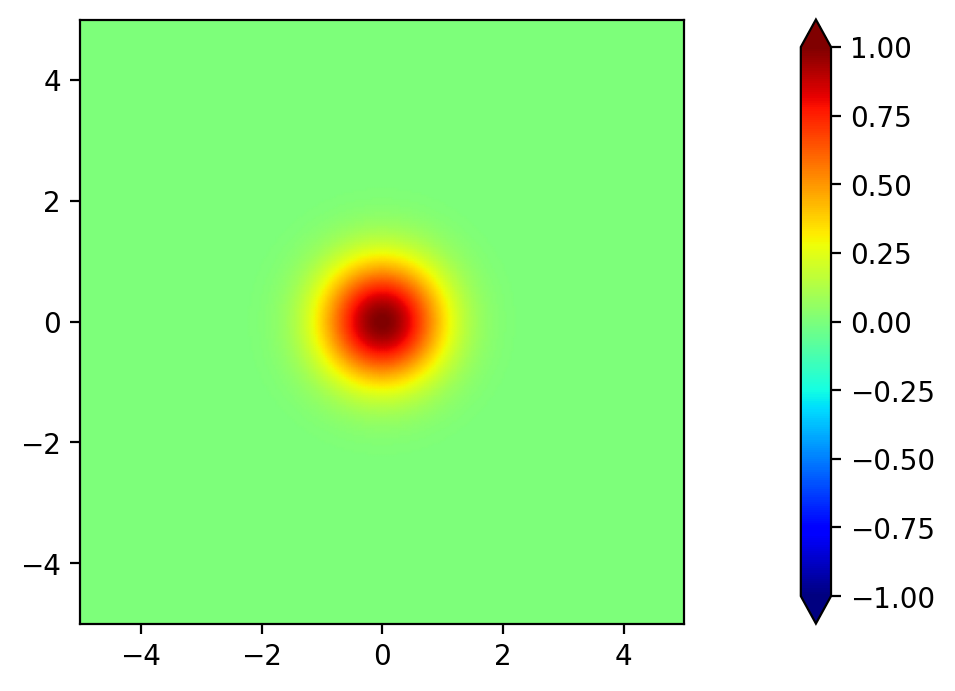

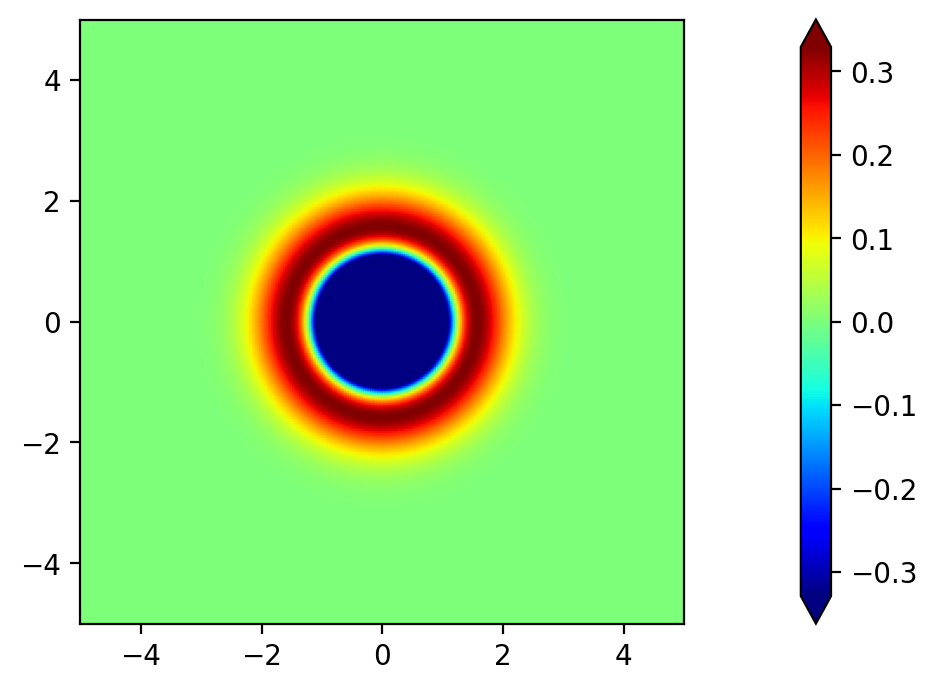

In [19]:
# Draw a slice of the function.
ed.draw_scalar_field(X,Y,Z,f, cutoff=f.max())

# Draw a slice of div-grad-f.
ed.draw_scalar_field(X,Y,Z,ddf, cutoff=ddf.max())

### Curl of a Gradient

The curl of the gradient is defined as
$$\mathbf{curl}(\mathbf{grad}(f)) = \nabla \times \nabla f$$

This operation has no special name.  Can you see why?

In [45]:
# Define a function in 3D.
f = np.exp(-X**2 - Y**2 - Z**2)

# Compute the curl of the gradient.
ddf = vc.curl(vc.grad(f,ds),ds)

<Axes3DSubplot:>

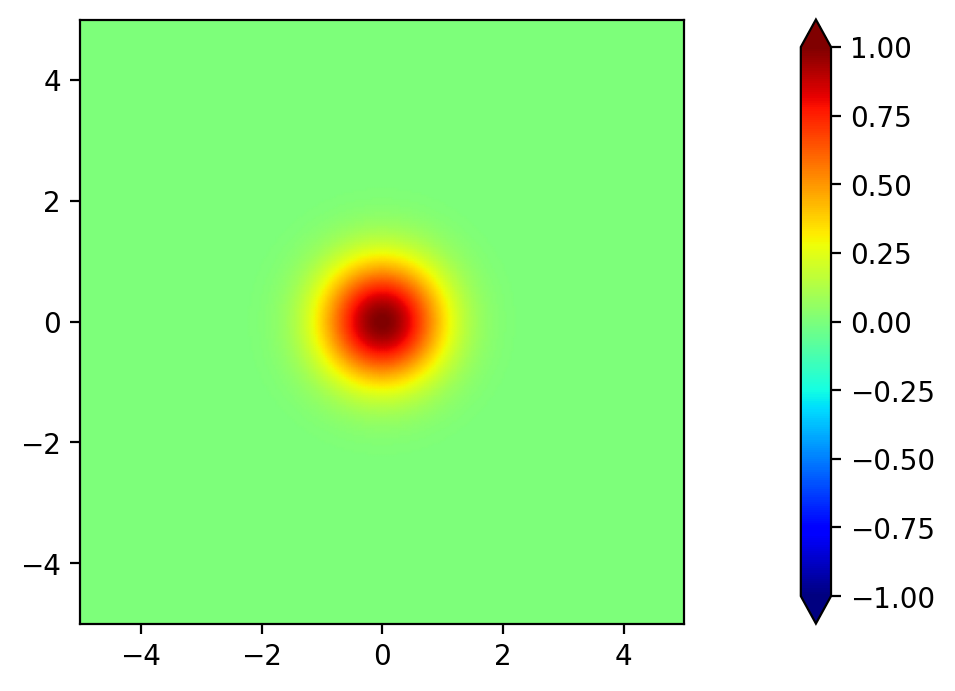

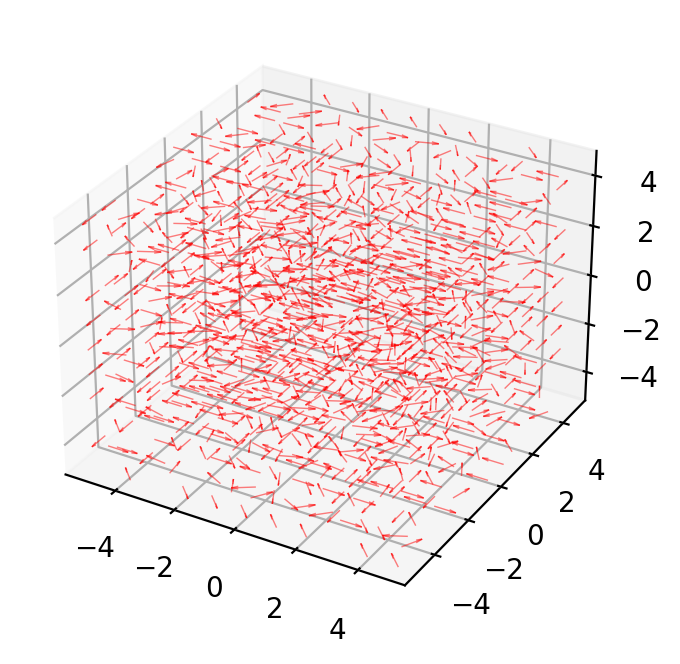

In [46]:
# Draw a slice of the function.
ed.draw_scalar_field(X,Y,Z,f, cutoff=f.max())

# Draw the vector field.
ed.draw_vector_field(X,Y,Z,*ddf)

<AxesSubplot:>

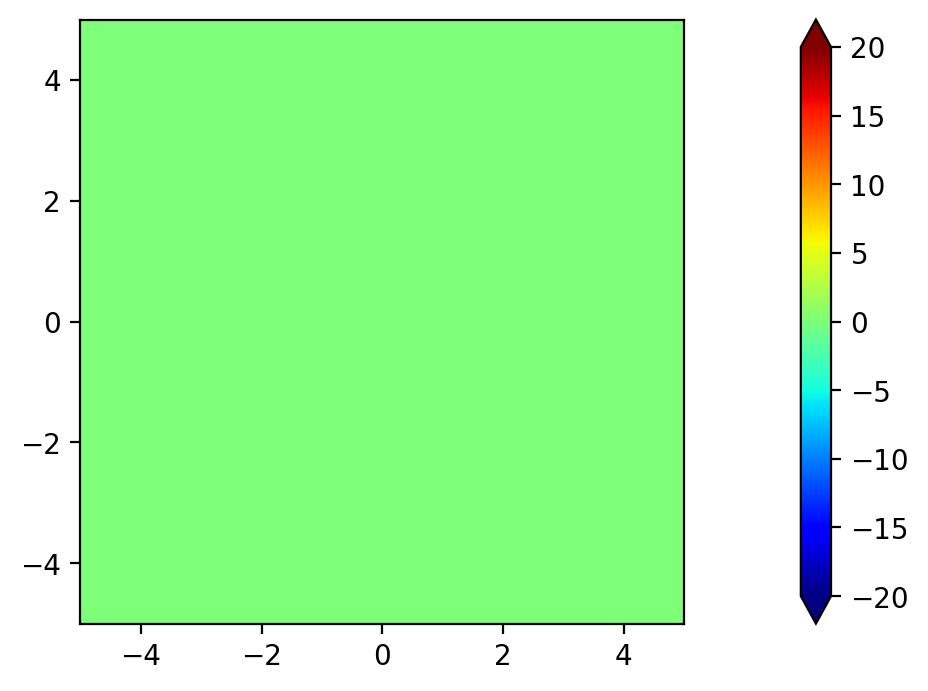

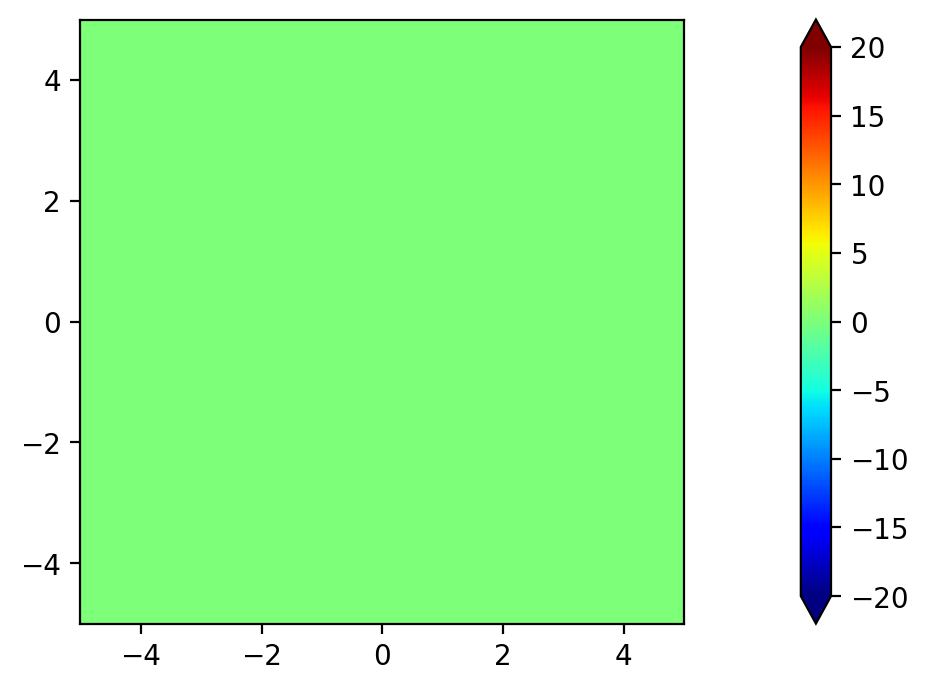

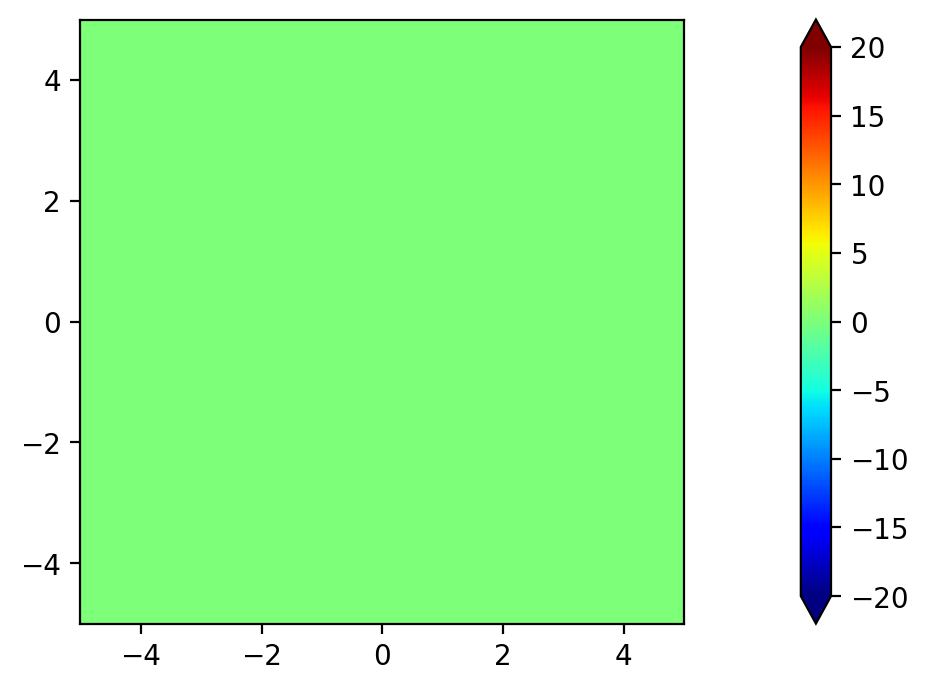

In [47]:
# Draw slices through the components of curl-grad-f.
z0 = 0.0
ed.draw_scalar_field(X,Y,Z,ddf[0], z0)  # x-component
ed.draw_scalar_field(X,Y,Z,ddf[1], z0)  # y-component
ed.draw_scalar_field(X,Y,Z,ddf[2], z0)  # z-component

### Curl of a Curl

The curl of the curl of a vector field is defined as
$$\mathbf{curl}(\mathbf{curl}(\vec{F})) = \nabla \times (\nabla \times \vec{F})$$

This operation will appear when we look at electromagnetic waves!

In [48]:
# Define a vector field.
Fx = Z*Y**2
Fy = Z*X**2
Fz = X*Y**2
F = np.stack([Fx, Fy, Fz])

# Compute the curl.
ddF = vc.curl(vc.curl(F,ds),ds)

<Axes3DSubplot:>

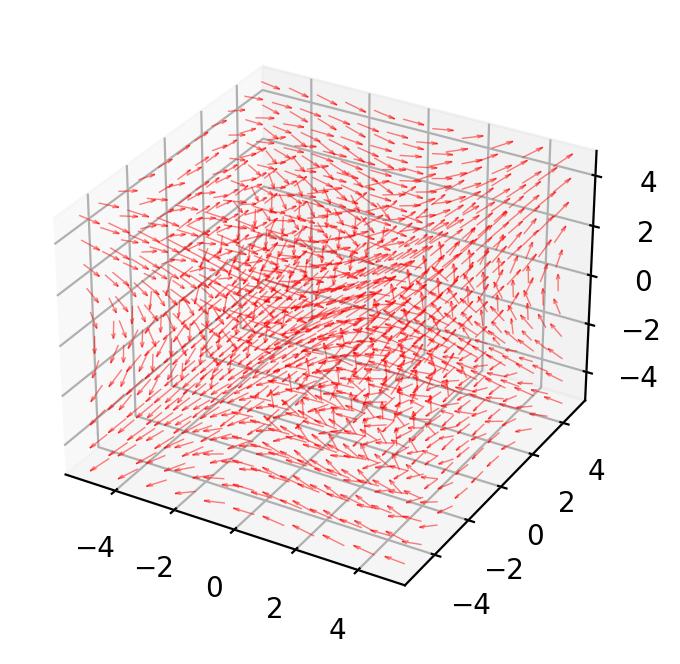

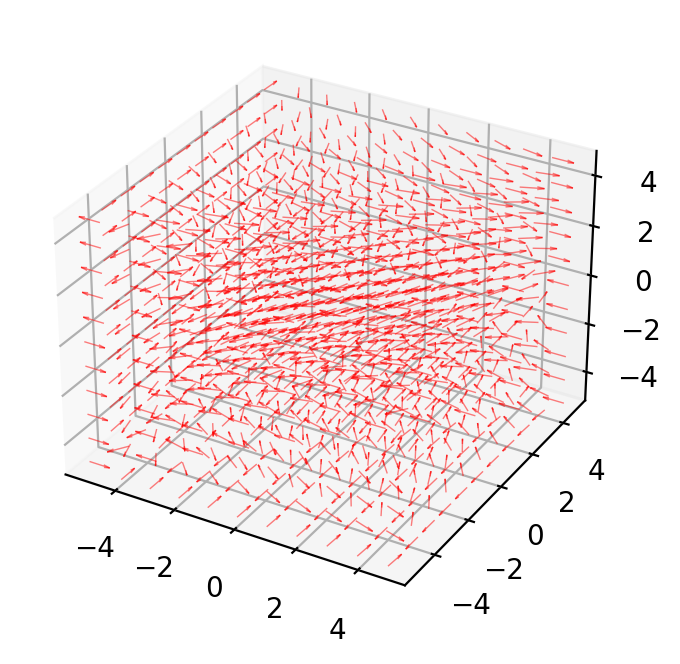

In [49]:
# Plot the vector field.
ed.draw_vector_field(X,Y,Z,*F)

# Plot the curl-of-the-curl.
ed.draw_vector_field(X,Y,Z,*ddF)

<AxesSubplot:>

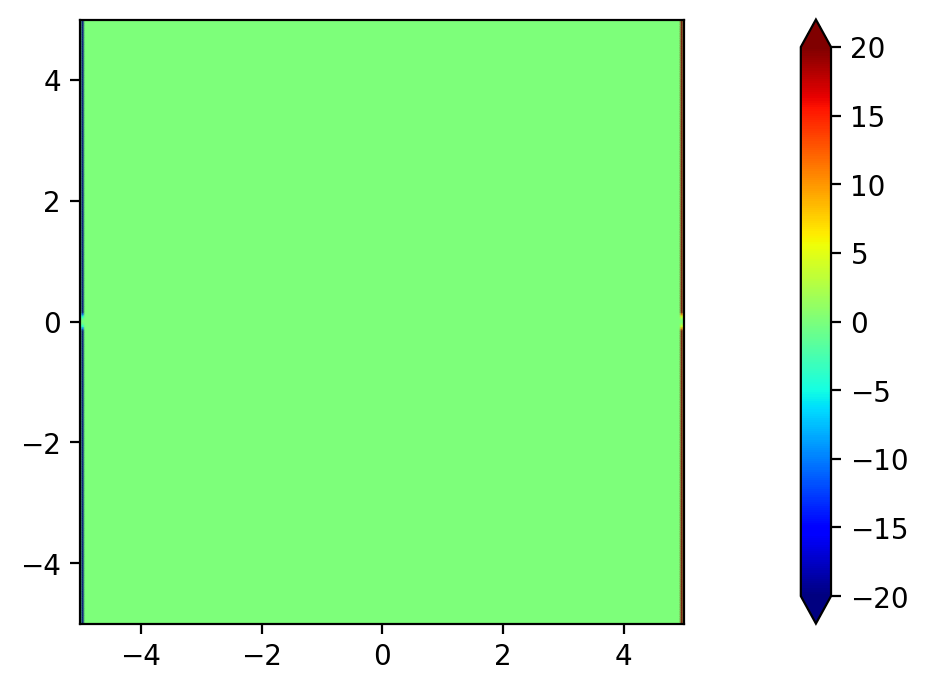

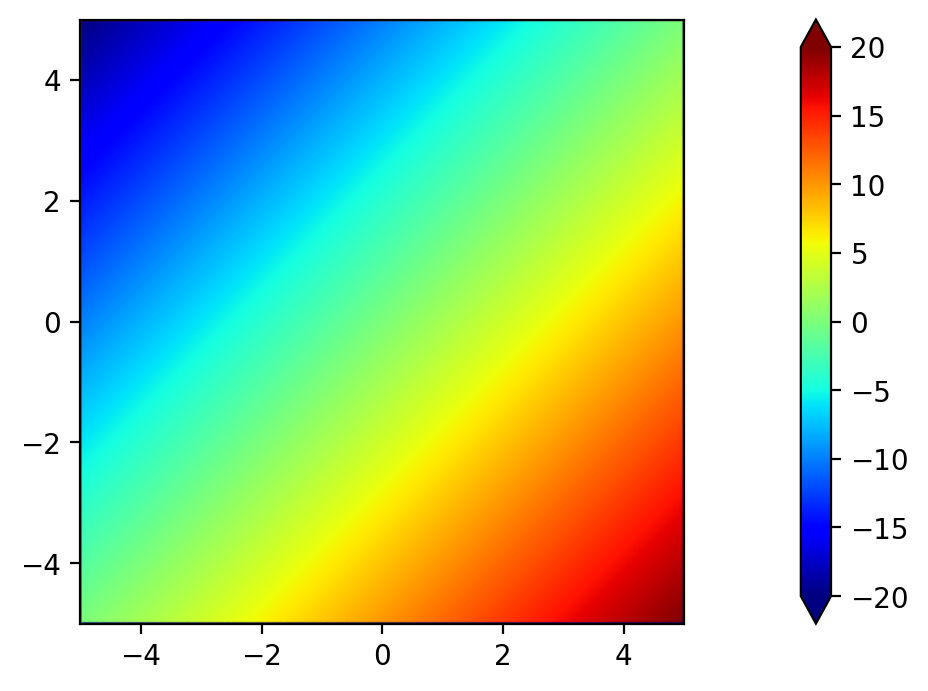

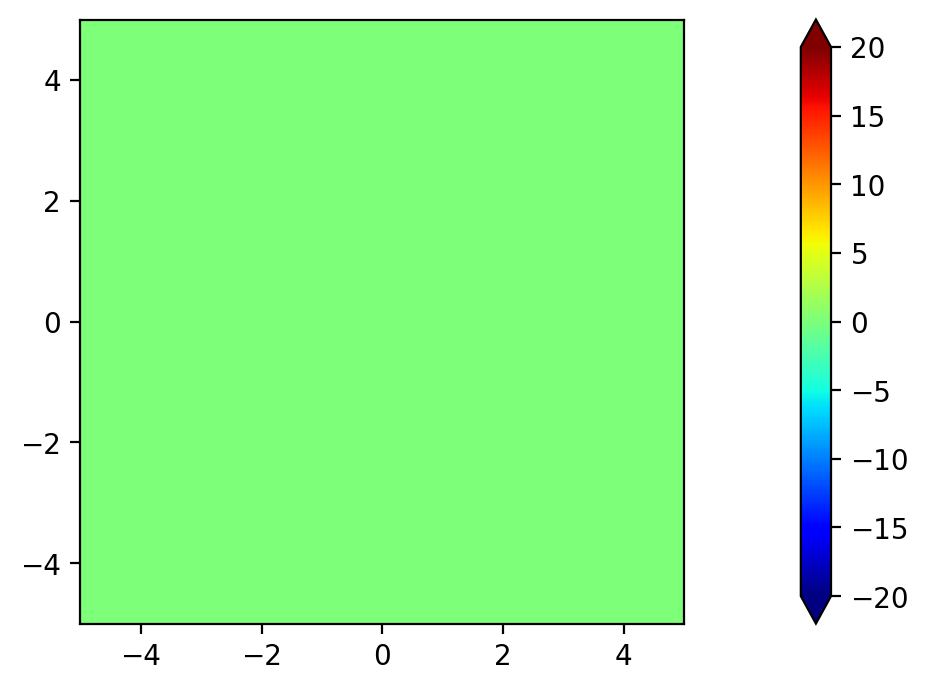

In [50]:
# Draw slices through the components of curl-curl-f.
z0 = 0.0
ed.draw_scalar_field(X,Y,Z,ddF[0], z0)  # x-component
ed.draw_scalar_field(X,Y,Z,ddF[1], z0)  # y-component
ed.draw_scalar_field(X,Y,Z,ddF[2], z0)  # z-component

### Divergence of a Curl

The divergence of the curl is written as
$$\mathbf{div}(\mathbf{curl}(\vec{F})) = \nabla \cdot (\nabla \times \vec{F})$$

This one has no special name either ...

In [51]:
# Define a vector field.
Fx = Z*Y**2
Fy = Z*X**2
Fz = X*Y**2
F = np.stack([Fx, Fy, Fz])

# Compute the curl.
ddF = vc.div(vc.curl(F,ds),ds)

<AxesSubplot:>

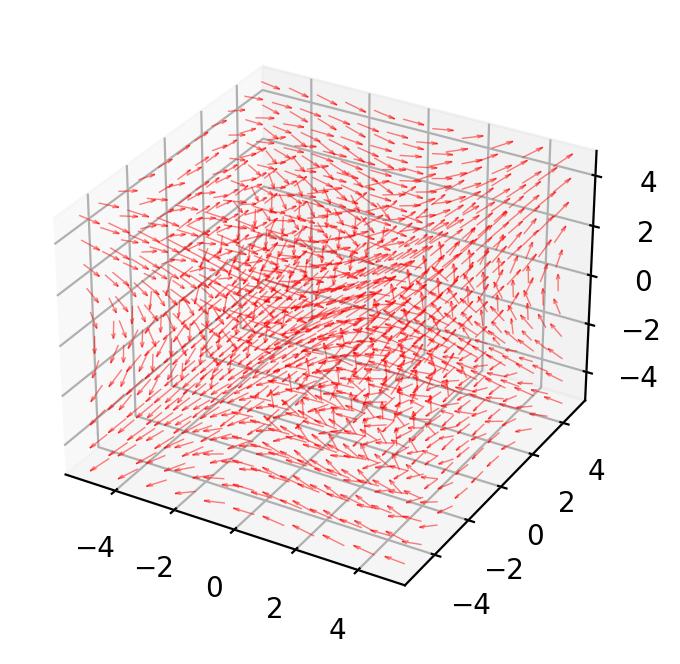

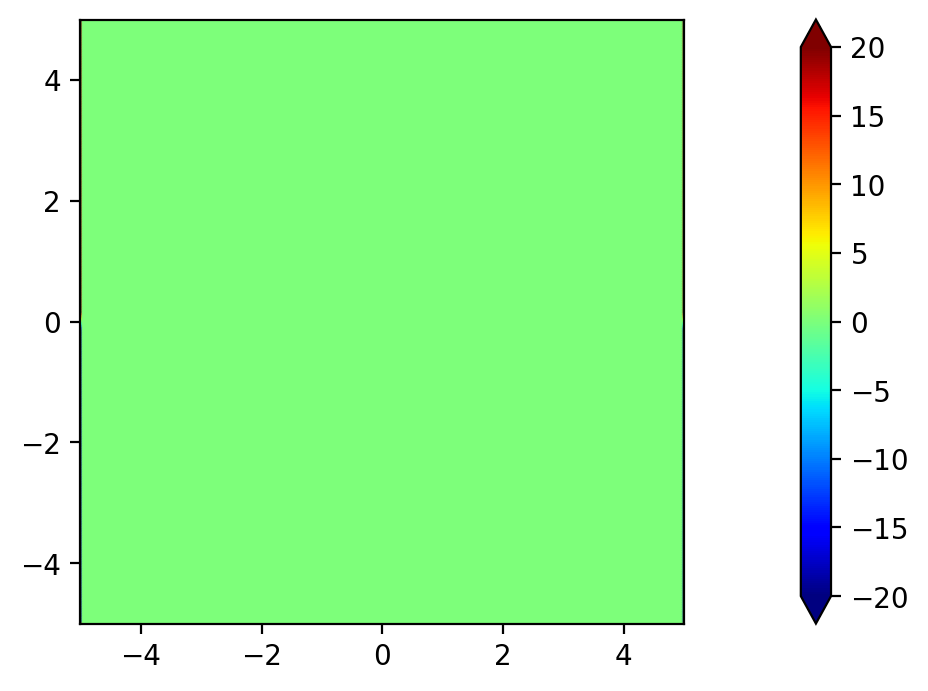

In [52]:
# Plot the vector field.
ed.draw_vector_field(X,Y,Z,*F)

# Plot a slice of div-curl-F.
z0 = 0.0
ed.draw_scalar_field(X,Y,Z,ddF, z0)

## Reflection and Summary

Congratulations!  You just completed a crash course in vector calculus!

- What are the major takeaways of this assignment for you?
- What was the most difficult part of this assignment?
- What was the most interesting part of this assignment?
- What questions do you have?

In [ ]:
Main takeaways are the diffulculty in visualizing fields with static plots. 
The most difficult part is understanding what the question is asking me to explain. 
The most interesting part is seeing the divergence of  different type of equations.
